# Modern Pandas (Part 7)

* see: https://github.com/TomAugspurger/effective-pandas
* see: https://tomaugspurger.github.io/modern-7-timeseries

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

# Timeseries

In [2]:
gs = web.DataReader("GS", data_source='yahoo', start='2006-01-01', end='2010-01-01')

In [4]:
gs.head().round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.44,124.23,126.70,128.87,6188700.0,110.46
2006-01-04,128.91,126.38,127.35,127.09,4861600.0,108.94
2006-01-05,127.32,125.61,126.00,127.04,3717400.0,108.90
2006-01-06,129.25,127.29,127.29,128.84,4319600.0,110.44
2006-01-09,130.62,128.00,128.50,130.39,4723500.0,111.77


# Special Slicing

In [7]:
gs.index[0]

Timestamp('2006-01-03 00:00:00')

In [8]:
gs.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2006-12-31')].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,110.464439
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,108.938675
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,108.895821
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,110.438721
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,111.767372


In [10]:
gs.loc['2006'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,110.464439
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,108.938675
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,108.895821
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,110.438721
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,111.767372


# Special Methods

## Resampling

In [13]:
gs.resample('5d').mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,128.730001,125.877501,126.834999,127.959997,4.771825e+06,109.684414
2006-01-08,132.645000,130.205002,130.349998,131.660000,4.664300e+06,112.855989
2006-01-13,133.395004,131.244995,131.510002,132.924995,3.258250e+06,113.940292
2006-01-18,133.853333,131.656667,132.210002,132.543335,4.997767e+06,113.683444
2006-01-23,136.083997,133.310001,133.771997,135.153998,3.968500e+06,116.067805


In [16]:
gs.resample('W').agg(['mean', 'sum']).head()

High                     Low                    Open  \
                  mean         sum        mean         sum        mean   
Date                                                                     
2006-01-08  128.730001  514.920006  125.877501  503.510002  126.834999   
2006-01-15  132.848001  664.240005  130.544000  652.720001  130.684000   
2006-01-22  133.672501  534.690002  131.389999  525.559998  131.907501   
2006-01-29  136.083997  680.419983  133.310001  666.550003  133.771997   
2006-02-05  142.467999  712.339996  139.937997  699.689987  140.900000   

                             Close                 Volume              \
                   sum        mean         sum       mean         sum   
Date                                                                    
2006-01-08  507.339996  127.959997  511.839989  4771825.0  19087300.0   
2006-01-15  653.419998  131.979999  659.899994  4310420.0  21552100.0   
2006-01-22  527.630005  132.555000  530.220001  4653725.0  18614900.0   
2006-01-29  668.859985  135.153998  675.769989  3968500.0  19842500.0   
2006-02-05  704.500000  141.618002  708.090012  3920120.0  19600600.0   

             Adj Close              
                  mean         sum  
Date                                
2006-01-08  109.684414  438.737656  
2006-01-15  113.130281  565.651405  
2006-01-22  113.675867  454.703468  
2006-01-29  116.067805  580.339027  
2006-02-05  121.618947  608.094734

In [17]:
gs.resample('6H').mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 00:00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,110.464439
2006-01-03 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,108.938675


## Rolling / Expanding / EW

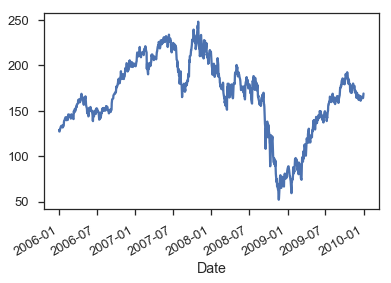

In [21]:
gs.Close.plot(label='Raw')

In [43]:
gs.Close.head()

Date
2006-01-03    128.869995
2006-01-04    127.089996
2006-01-05    127.040001
2006-01-06    128.839996
2006-01-09    130.389999
Name: Close, dtype: float64

In [47]:
gs.Close.expanding().mean().head()

Date
2006-01-03    128.869995
2006-01-04    127.979996
2006-01-05    127.666664
2006-01-06    127.959997
2006-01-09    128.445998
Name: Close, dtype: float64

In [49]:
gs.Close.ewm(alpha=0.03).mean().head()

Date
2006-01-03    128.869995
2006-01-04    127.966442
2006-01-05    127.648176
2006-01-06    127.959879
2006-01-09    128.475953
Name: Close, dtype: float64

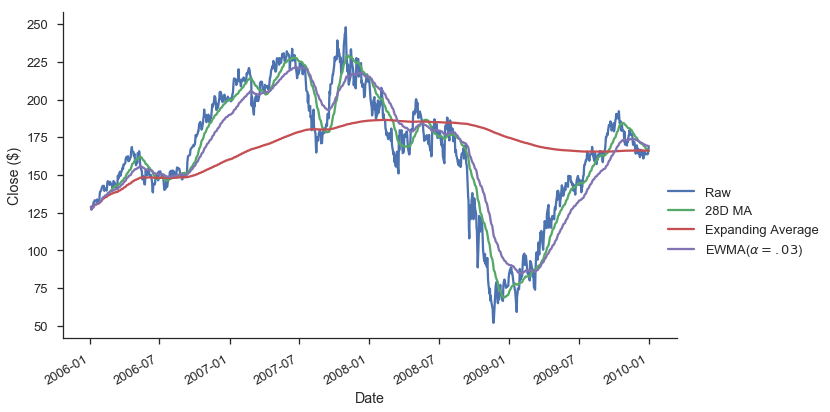

In [32]:
plt.figure(figsize=(12, 6))
gs.Close.plot(label='Raw')
gs.Close.rolling(28).mean().plot(label='28D MA')
gs.Close.expanding().mean().plot(label='Expanding Average')
gs.Close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.ylabel("Close ($)")
plt.tight_layout()
sns.despine()

In [33]:
roll = gs.Close.rolling(30, center=True)
roll

Rolling [window=30,center=True,axis=0]

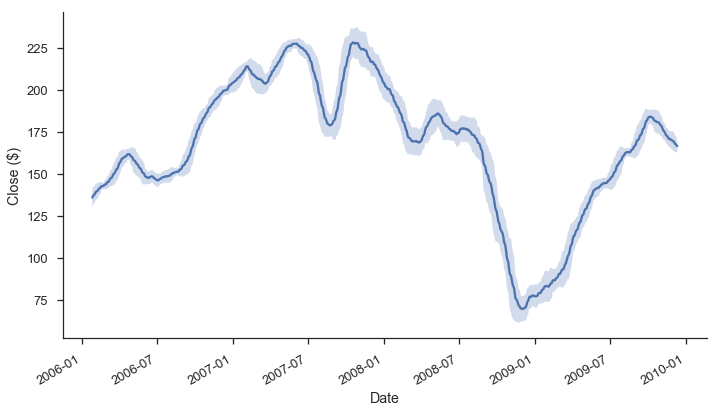

In [37]:
plt.figure(figsize=(10, 6))
m = roll.agg(['mean', 'std'])
ax = m['mean'].plot()
ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'], alpha=.25)
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

# Grab Bag

## Offsets

In [51]:
gs.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [50]:
gs.index + pd.DateOffset(months=3, days=-2)

DatetimeIndex(['2006-04-01', '2006-04-02', '2006-04-03', '2006-04-04',
               '2006-04-07', '2006-04-08', '2006-04-09', '2006-04-10',
               '2006-04-11', '2006-04-15',
               ...
               '2010-03-15', '2010-03-16', '2010-03-19', '2010-03-20',
               '2010-03-21', '2010-03-22', '2010-03-26', '2010-03-27',
               '2010-03-28', '2010-03-29'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

## Holiday Calendars

In [52]:
from pandas.tseries.holiday import USColumbusDay

In [53]:
USColumbusDay.dates('2015-01-01', '2020-01-01')

DatetimeIndex(['2015-10-12', '2016-10-10', '2017-10-09', '2018-10-08',
               '2019-10-14'],
              dtype='datetime64[ns]', freq='WOM-2MON')

## Timezones

In [55]:
gs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,110.464439
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,108.938675
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,108.895821
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,110.438721
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,111.767372


In [54]:
gs.tz_localize('US/Eastern').tz_convert('UTC').head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 05:00:00+00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,110.464439
2006-01-04 05:00:00+00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,108.938675
2006-01-05 05:00:00+00:00,127.320000,125.610001,126.000000,127.040001,3717400.0,108.895821
2006-01-06 05:00:00+00:00,129.250000,127.290001,127.290001,128.839996,4319600.0,110.438721
2006-01-09 05:00:00+00:00,130.619995,128.000000,128.500000,130.389999,4723500.0,111.767372


# Modeling Time Series

TODO: not ye done